## Randomly select at least 1000 unique (non-repeat) cities based on latitude and longitude. And perform a weather check on each of the cities using a series of successive API calls

First we'll create a empty set to hold our city names, python sets do not accept duplicate datapoints which means we don't have to check for duplicates later. longitude ranges from -180 to 180 while latitude ranges from -90 to 90. We use the **random** library's **uniform** function to randomly pick pairings of lat and long values to put into the **citipy** function. The outputed *city names* and *country codes* will be inserted into the *set*. These same city name, country code pairs are sent to the OpenWeatherMaps API and if a city's weather report is found, (https status code 200) it'll be stored in the weather list.  We'll put this all under a **while** loop to keep on generating coordinates and cities until we fill up our weather list with 1000 unique values.

In [12]:
from citipy import citipy
from random import uniform # Draw samples from a uniform distribution
import requests
from pprint import pprint
from config import key
url = 'http://api.openweathermap.org/data/2.5/weather?'
cities = list()
weather = list()
duplicate_cities = list()
weatherless_cities = set()
while len(weather) < 1001:
    # generate a 1000 unique latitude and longitude values
    
    long = round(uniform(-180,180), 3) #longitude ranges from -180 to 180
    lat = round(uniform(-90, 90), 3) #latitude ranges from -90 to 90
    #feed into citipy the lat, long coordinates to return as city object
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    
    # add the city and it's country code to the cities set
    city_entry = f"{city_name},{country_code}"
    if city_entry not in cities:
        cities.append(city_entry)
        print(f"city generated: {city_entry}")
        payload = url + f"{city}"
        keyed_payload = url + "appid=" + key + "&q=" + city_entry + "?" + "&units=metric"
        print(f"processing request for {payload}")

        response = requests.get(keyed_payload)
        weather_json = response.json()
        print("associated weather data: \n")
        pprint(weather_json)
        if weather_json['cod'] == 200:
            weather.append(weather_json)
        elif weather_json['cod'] == 404:
            weatherless_cities.add(city_entry)
        else:
            pass
    else:
        print(f"duplicate city: {city_entry}")
        duplicate_cities.append(city_entry)
        
    

city generated: kaitangata,nz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814B652E8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -46.28, 'lon': 169.85},
 'dt': 1523689063,
 'id': 2208248,
 'main': {'grnd_level': 1009.92,
          'humidity': 75,
          'pressure': 1009.92,
          'sea_level': 1026.99,
          'temp': 9.06,
          'temp_max': 9.06,
          'temp_min': 9.06},
 'name': 'Kaitangata',
 'sys': {'country': 'NZ',
         'message': 0.0038,
         'sunrise': 1523646939,
         'sunset': 1523685929},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 58.5051, 'speed': 7.34}}
city generated: albany,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B326D8>
associated weather data: 

{

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 22.54, 'lon': 120.62},
 'dt': 1523685600,
 'id': 1670479,
 'main': {'humidity': 59,
          'pressure': 1010,
          'temp': 30.64,
          'temp_max': 32,
          'temp_min': 29},
 'name': 'Xinzhi',
 'sys': {'country': 'TW',
         'id': 7485,
         'message': 0.0036,
         'sunrise': 1523655509,
         'sunset': 1523701047,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 5.7}}
duplicate city: port alfred,za
city generated: dingle,ie
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814478710>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 11, 'lon': 122.67},
 'dt': 1523689068,
 'id': 1714733,
 '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 71.98, 'lon': 102.47},
 'dt': 1523689072,
 'id': 2022572,
 'main': {'grnd_level': 1007.89,
          'humidity': 95,
          'pressure': 1007.89,
          'sea_level': 1012.56,
          'temp': -7.8,
          'temp_max': -7.8,
          'temp_min': -7.8},
 'name': 'Khatanga',
 'sys': {'country': 'RU',
         'message': 0.0042,
         'sunrise': 1523652942,
         'sunset': 1523712533},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 238.505, 'speed': 6.09}}
city generated: belushya guba,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8150BBEB8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: sao filipe,cv
processing request for http://api.openweathermap.org/data/2.5/weather?<ci

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -0.41, 'lon': -65.02},
 'dt': 1523689078,
 'id': 3662489,
 'main': {'grnd_level': 1018.35,
          'humidity': 95,
          'pressure': 1018.35,
          'sea_level': 1024.19,
          'temp': 24.61,
          'temp_max': 24.61,
          'temp_min': 24.61},
 'name': 'Santa Isabel do Rio Negro',
 'sys': {'country': 'BR',
         'message': 0.3894,
         'sunrise': 1523701032,
         'sunset': 1523744597},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 102.505, 'speed': 0.91}}
city generated: ust-nera,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8152C20B8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 64.57, 'lon': 143.24},
 'dt': 1523689078,
 'id'

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: hilo,us
city generated: tomari,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81529FF28>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.76, 'lon': 142.06},
 'dt': 1523689088,
 'id': 2120530,
 'main': {'grnd_level': 1019.72,
          'humidity': 66,
          'pressure': 1019.72,
          'sea_level': 1028.81,
          'temp': 4.06,
          'temp_max': 4.06,
          'temp_min': 4.06},
 'name': 'Tomari',
 'sys': {'country': 'RU',
         'message': 0.0042,
         'sunrise': 1523648713,
         'sunset': 1523697591},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 286.005, 'speed': 1.44}}
duplicate city: castro,cl
city generated: katobu,id
processing request for http://api.op

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.67, 'lon': 33.6},
 'dt': 1523689092,
 'id': 749747,
 'main': {'grnd_level': 885.49,
          'humidity': 59,
          'pressure': 885.49,
          'sea_level': 1032.66,
          'temp': 12.76,
          'temp_max': 12.76,
          'temp_min': 12.76},
 'name': 'Ayan',
 'sys': {'country': 'TR',
         'message': 0.1304,
         'sunrise': 1523675307,
         'sunset': 1523723034},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 25.5051, 'speed': 1.44}}
city generated: le port,re
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ECE160>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 42.87, 'lon': 1.37},
 'dt': 1523689093,
 'id': 3036965,
 'main': {'grnd_level': 837

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 4.87, 'lon': -2.24},
 'dt': 1523689099,
 'id': 2303611,
 'main': {'grnd_level': 1023.21,
          'humidity': 100,
          'pressure': 1023.21,
          'sea_level': 1025.57,
          'temp': 27.66,
          'temp_max': 27.66,
          'temp_min': 27.66},
 'name': 'Axim',
 'sys': {'country': 'GH',
         'message': 0.0334,
         'sunrise': 1523685754,
         'sunset': 1523729750},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 232.505, 'speed': 5.39}}
city generated: tumannyy,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8152AC240>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: conceicao do almeida,br
processing request for http://api.openweathermap.org/data/2.5

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 39.51, 'lon': 54.36},
 'dt': 1523689107,
 'id': 161616,
 'main': {'grnd_level': 987.3,
          'humidity': 72,
          'pressure': 987.3,
          'sea_level': 1026.5,
          'temp': 13.66,
          'temp_max': 13.66,
          'temp_min': 13.66},
 'name': 'Balkanabat',
 'sys': {'country': 'TM',
         'message': 0.0034,
         'sunrise': 1523670415,
         'sunset': 1523717962},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 232.505, 'speed': 1.94}}
duplicate city: punta arenas,cl
duplicate city: kodiak,us
city generated: sibolga,id
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8144629E8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 1.74, 'lon':

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -1.82, 'lon': -44.87},
 'dt': 1523689111,
 'id': 3401148,
 'main': {'grnd_level': 1024.67,
          'humidity': 97,
          'pressure': 1024.67,
          'sea_level': 1025.77,
          'temp': 22.96,
          'temp_max': 22.96,
          'temp_min': 22.96},
 'name': 'Cururupu',
 'sys': {'country': 'BR',
         'message': 0.005,
         'sunrise': 1523696253,
         'sunset': 1523739703},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 307.505, 'speed': 0.59}}
duplicate city: bluff,nz
duplicate city: georgetown,sh
city generated: nikolskoye,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8151D5C18>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 59.7, 'lon': 30.79

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: avera,pf
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BC2390>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.19, 'lon': -82.53},
 'dt': 1523687700,
 'id': 4231997,
 'main': {'humidity': 72,
          'pressure': 1021,
          'temp': 17.61,
          'temp_max': 18,
          'temp_min': 17},
 'name': 'Avera',
 'sys': {'country': 'US',
         'id': 783,
         'message': 0.1339,
         'sunrise': 1523703655,
         'sunset': 1523750409,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 3.1}}
city generated: fernie,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City obj

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.95, 'lon': 4.24},
 'dt': 1523687400,
 'id': 2995603,
 'main': {'humidity': 87,
          'pressure': 1017,
          'temp': 10.55,
          'temp_max': 11,
          'temp_min': 10},
 'name': 'Saint-Pierre',
 'sys': {'country': 'FR',
         'id': 5604,
         'message': 0.0037,
         'sunrise': 1523681628,
         'sunset': 1523730821,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'speed': 4.6}}
duplicate city: hilo,us
city generated: grimari,cf
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813DC9748>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: ajdabiya,ly
processing request for http://api.openweathermap.org/data/2.5/weathe

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.14, 'lon': -8.45},
 'dt': 1523687400,
 'id': 2267254,
 'main': {'humidity': 87,
          'pressure': 1017,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'Lagoa',
 'sys': {'country': 'PT',
         'id': 5948,
         'message': 0.0036,
         'sunrise': 1523685639,
         'sunset': 1523732878,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'speed': 4.1}}
duplicate city: atuona,pf
city generated: trairi,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813D26E48>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -3.28, 'lon': -39.27},
 'dt': 1523689125,
 'id': 3386177,
 'main': {'grn

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 40.04, 'lon': -86.13},
 'dt': 1523687700,
 'id': 4928118,
 'main': {'humidity': 68,
          'pressure': 1007,
          'temp': 19.65,
          'temp_max': 22,
          'temp_min': 18},
 'name': 'Westfield',
 'sys': {'country': 'US',
         'id': 1037,
         'message': 0.0056,
         'sunrise': 1523704059,
         'sunset': 1523751743,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 200, 'speed': 3.1}}
duplicate city: punta arenas,cl
city generated: paamiut,gl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81427A550>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: atuona,pf
duplicate city: luderitz,na
duplica

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: aranos,na
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ABF940>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -24.14, 'lon': 19.11},
 'dt': 1523689134,
 'id': 3358666,
 'main': {'grnd_level': 897,
          'humidity': 85,
          'pressure': 897,
          'sea_level': 1031.81,
          'temp': 17.61,
          'temp_max': 17.61,
          'temp_min': 17.61},
 'name': 'Aranos',
 'sys': {'country': 'NA',
         'message': 0.004,
         'sunrise': 1523681838,
         'sunset': 1523723396},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150.005, 'speed': 2.16}}
city generated: tutoia,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City ob

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 60.79, 'lon': -161.76},
 'dt': 1523685180,
 'id': 5880568,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 2,
          'temp_max': 2,
          'temp_min': 2},
 'name': 'Bethel',
 'sys': {'country': 'US',
         'id': 28,
         'message': 0.0035,
         'sunrise': 1523719746,
         'sunset': 1523772412,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 4.1}}
duplicate city: nikolskoye,ru
city generated: ribeira grande,pt
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814EA1E48>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: pisco,pe
duplicate city: ushuaia,ar
city generated: cabedelo,br
proces

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 49.72, 'lon': -86.95},
 'dt': 1523685600,
 'id': 5960603,
 'main': {'humidity': 51,
          'pressure': 1030,
          'temp': -11,
          'temp_max': -11,
          'temp_min': -11},
 'name': 'Geraldton',
 'sys': {'country': 'CA',
         'id': 3656,
         'message': 0.1624,
         'sunrise': 1523703403,
         'sunset': 1523752811,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 3.6}}
city generated: bredasdorp,za
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81589F978>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -34.53, 'lon': 20.04},
 'dt': 1523685600,
 'id': 1015776,
 'main': {'humidity': 93,


associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: nizhneyansk,ru
city generated: antofagasta,cl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E06668>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -23.65, 'lon': -70.4},
 'dt': 1523685600,
 'id': 3899539,
 'main': {'humidity': 87,
          'pressure': 1015,
          'temp': 16,
          'temp_max': 16,
          'temp_min': 16},
 'name': 'Antofagasta',
 'sys': {'country': 'CL',
         'id': 4647,
         'message': 0.0101,
         'sunrise': 1523703304,
         'sunset': 1523744888,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 0.5}}
city generated: leningradskiy,ru
processing request for http://api.openweather

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: lata,sb
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815314EF0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 30.78, 'lon': 78.62},
 'dt': 1523689155,
 'id': 1253628,
 'main': {'grnd_level': 785.71,
          'humidity': 62,
          'pressure': 785.71,
          'sea_level': 1022.82,
          'temp': 15.96,
          'temp_max': 15.96,
          'temp_min': 15.96},
 'name': 'Lata',
 'sys': {'country': 'IN',
         'message': 0.0034,
         'sunrise': 1523665152,
         'sunset': 1523711570},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 212.005, 'speed': 0.89}}
duplicate city: punta arenas,cl
duplicate city: albany,au
city generated: lincoln,nz
processing request for

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 51.71, 'lon': 143.23},
 'dt': 1523689160,
 'id': 2122783,
 'main': {'grnd_level': 1025.97,
          'humidity': 97,
          'pressure': 1025.97,
          'sea_level': 1028.29,
          'temp': -1.7,
          'temp_max': -1.7,
          'temp_min': -1.7},
 'name': 'Katangli',
 'sys': {'country': 'RU',
         'message': 0.0046,
         'sunrise': 1523648023,
         'sunset': 1523697729},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 15.5051, 'speed': 3.54}}
city generated: gamba,ga
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8141DF9B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.28, 'lon': 88.52},
 'dt': 1523689160,
 'id': 1281256,
 'main': {'grnd_leve

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: carnarvon,au
duplicate city: grindavik,is
duplicate city: punta arenas,cl
duplicate city: cape town,za
duplicate city: alice springs,au
duplicate city: teya,ru
city generated: saint-denis,re
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ECE470>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.94, 'lon': 2.36},
 'dt': 1523687400,
 'id': 2980916,
 'main': {'humidity': 93,
          'pressure': 1016,
          'temp': 8.74,
          'temp_max': 11,
          'temp_min': 6},
 'name': 'Saint-Denis',
 'sys': {'country': 'FR',
         'id': 5610,
         'message': 0.0043,
         'sunrise': 1523682080,
         'sunset': 1523731271,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 50, 'speed'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.45, 'lon': 22.34},
 'dt': 1523686800,
 'id': 262462,
 'main': {'humidity': 82,
          'pressure': 1018,
          'temp': 17,
          'temp_max': 17,
          'temp_min': 17},
 'name': 'Saint George',
 'sys': {'country': 'GR',
         'id': 5674,
         'message': 0.006,
         'sunrise': 1523678096,
         'sunset': 1523725648,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 122.505, 'speed': 0.66}}
duplicate city: hithadhoo,mv
city generated: amderma,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8150A0048>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: arraial do cabo,br
duplicate city: ushuaia,ar
duplicate city: bluff,nz
dupl

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: kaitangata,nz
duplicate city: kaitangata,nz
city generated: yaan,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E820B8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 7.38, 'lon': 8.57},
 'dt': 1523689172,
 'id': 2338660,
 'main': {'grnd_level': 1008.46,
          'humidity': 79,
          'pressure': 1008.46,
          'sea_level': 1025.45,
          'temp': 26.06,
          'temp_max': 26.06,
          'temp_min': 26.06},
 'name': 'Yaan',
 'sys': {'country': 'NG',
         'message': 0.0089,
         'sunrise': 1523683057,
         'sunset': 1523727260},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 211.005, 'speed': 5.71}}
duplicate city: puerto ayora,ec
duplicate city: chuy,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 33.46, 'lon': 50.29},
 'dt': 1523689176,
 'id': 133037,
 'main': {'grnd_level': 810.76,
          'humidity': 65,
          'pressure': 810.76,
          'sea_level': 1023.34,
          'temp': 10.96,
          'temp_max': 10.96,
          'temp_min': 10.96},
 'name': 'Golpayegan',
 'sys': {'country': 'IR',
         'message': 0.0033,
         'sunrise': 1523671789,
         'sunset': 1523718533},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 281.505, 'speed': 1.61}}
duplicate city: busselton,au
duplicate city: port alfred,za
city generated: ixtapa,mx
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814A0D198>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 20.71, 'lon': -10

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: dikson,ru
duplicate city: punta arenas,cl
duplicate city: kaitangata,nz
duplicate city: padang,id
duplicate city: albany,au
city generated: sayyan,ye
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815899DA0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: dromolaxia,cy
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813F492B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 34.88, 'lon': 33.59},
 'dt': 1523687400,
 'id': 146400,
 'main': {'humidity': 53,
          'pressure': 1015,
          'temp': 21.48,
          'temp_max': 23,
          'temp_min': 20},
 'name': 'Dromolaxia',
 'sys': {'country': 'CY',
         'id': 5448,
         'message': 0.0038,
         'sunrise': 1523675705,
  

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.84, 'lon': 107.58},
 'dt': 1523687400,
 'id': 2014407,
 'main': {'humidity': 16,
          'pressure': 1014,
          'temp': 15,
          'temp_max': 15,
          'temp_min': 15},
 'name': 'Ulan-Ude',
 'sys': {'country': 'RU',
         'id': 7261,
         'message': 0.005,
         'sunrise': 1523656551,
         'sunset': 1523706310,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 5}}
duplicate city: saint george,bm
city generated: camacha,pt
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814E824E0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: carnarvon,au
duplicate city: luderitz,na
duplicate ci

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -32.49, 'lon': 137.76},
 'dt': 1523685600,
 'id': 2063056,
 'main': {'humidity': 77,
          'pressure': 1010,
          'temp': 19,
          'temp_max': 19,
          'temp_min': 19},
 'name': 'Port Augusta',
 'sys': {'country': 'AU',
         'id': 8241,
         'message': 0.0043,
         'sunrise': 1523653766,
         'sunset': 1523694518,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'gust': 17.5, 'speed': 11.3}}
duplicate city: bredasdorp,za
duplicate city: torbay,ca
city generated: dakar,sn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815358EB8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.69, 'lon': 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -9.35, 'lon': 28.74},
 'dt': 1523689192,
 'id': 175499,
 'main': {'grnd_level': 911.76,
          'humidity': 92,
          'pressure': 911.76,
          'sea_level': 1027.19,
          'temp': 20.76,
          'temp_max': 20.76,
          'temp_min': 20.76},
 'name': 'Nchelenge',
 'sys': {'country': 'ZM',
         'message': 0.0034,
         'sunrise': 1523678892,
         'sunset': 1523721732},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 117.505, 'speed': 1.56}}
city generated: makokou,ga
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8141DFE80>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 0.56, 'lon': 12.85},
 'dt': 1523689192,
 'id': 2399371,
 'main': {'grnd

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: kruisfontein,za
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8158AAA20>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: ponta do sol,cv
city generated: banepa,np
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814B59DD8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 27.63, 'lon': 85.52},
 'dt': 1523686800,
 'id': 1283679,
 'main': {'humidity': 29,
          'pressure': 1015,
          'temp': 26,
          'temp_max': 26,
          'temp_min': 26},
 'name': 'Banepa',
 'sys': {'country': 'NP',
         'id': 7907,
         'message': 0.0037,
         'sunrise': 1523663670,
         'sunset': 1523709737,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: prattville,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8154AE128>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 32.46, 'lon': -86.46},
 'dt': 1523687700,
 'id': 4084796,
 'main': {'humidity': 88,
          'pressure': 1016,
          'temp': 17.5,
          'temp_max': 18,
          'temp_min': 16},
 'name': 'Prattville',
 'sys': {'country': 'US',
         'id': 234,
         'message': 0.008,
         'sunrise': 1523704641,
         'sunset': 1523751308,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 2.1}}
duplicate city: rikitea,pf
city generated: kaniama,cd
processing request for http://api.openweathermap.org/data

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 67.55, 'lon': 63.78},
 'dt': 1523689222,
 'id': 1486910,
 'main': {'grnd_level': 984.71,
          'humidity': 94,
          'pressure': 984.71,
          'sea_level': 1005.11,
          'temp': -0.6,
          'temp_max': -0.6,
          'temp_min': -0.6},
 'name': 'Komsomolskiy',
 'sys': {'country': 'RU',
         'message': 0.1652,
         'sunrise': 1523664049,
         'sunset': 1523719921},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 303.005, 'speed': 8.51}}
city generated: roebourne,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B49898>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.77, 'lon': 117.15},
 'dt': 1523689222,
 'id': 2062276,
 'main': {

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -35.55, 'lon': 138.62},
 'dt': 1523687400,
 'id': 2059470,
 'main': {'humidity': 55,
          'pressure': 1007,
          'temp': 18,
          'temp_max': 18,
          'temp_min': 18},
 'name': 'Victor Harbor',
 'sys': {'country': 'AU',
         'id': 8204,
         'message': 0.469,
         'sunrise': 1523653728,
         'sunset': 1523694141,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 12.3}}
duplicate city: carnarvon,au
duplicate city: vaini,to
duplicate city: vaini,to
duplicate city: lebu,cl
duplicate city: cabo san lucas,mx
duplicate city: hermanus,za
city generated: ningyang,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E616A0>
associated weather


{'cod': '404', 'message': 'city not found'}
duplicate city: port elizabeth,za
duplicate city: talakan,ru
duplicate city: port elizabeth,za
duplicate city: tasiilaq,gl
duplicate city: east london,za
duplicate city: mataura,pf
duplicate city: pevek,ru
city generated: pacific grove,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8154E89B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.62, 'lon': -121.92},
 'dt': 1523687700,
 'id': 5380437,
 'main': {'humidity': 71,
          'pressure': 1028,
          'temp': 11.76,
          'temp_max': 13,
          'temp_min': 11},
 'name': 'Pacific Grove',
 'sys': {'country': 'US',
         'id': 399,
         'message': 0.0036,
         'sunrise': 1523712880,
         'sunset': 1523760092,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
 

associated weather data: 

{'cod': '500', 'message': 'Internal error: 500001'}
city generated: kyshtovka,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81518EA58>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 56.56, 'lon': 76.62},
 'dt': 1523689229,
 'id': 1501000,
 'main': {'grnd_level': 1011.3,
          'humidity': 95,
          'pressure': 1011.3,
          'sea_level': 1025.69,
          'temp': -1.2,
          'temp_max': -1.2,
          'temp_min': -1.2},
 'name': 'Kyshtovka',
 'sys': {'country': 'RU',
         'message': 0.8032,
         'sunrise': 1523663360,
         'sunset': 1523714375},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 272.005, 'speed': 6.21}}
city generated: rabo de peixe,pt
processing request for http://api.openweathermap.org/data/2.5/weathe

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: dikson,ru
city generated: pokaran,in
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8145DF630>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.93, 'lon': 71.92},
 'dt': 1523689235,
 'id': 1259460,
 'main': {'grnd_level': 994.19,
          'humidity': 34,
          'pressure': 994.19,
          'sea_level': 1021.72,
          'temp': 33.21,
          'temp_max': 33.21,
          'temp_min': 33.21},
 'name': 'Pokaran',
 'sys': {'country': 'IN',
         'message': 0.0055,
         'sunrise': 1523666969,
         'sunset': 1523712964},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90.0051, 'speed': 2.39}}
city generated: labrea,br
processing request for http://api.openweathermap.org/data/


{'cod': '404', 'message': 'city not found'}
duplicate city: belushya guba,ru
duplicate city: victoria,sc
duplicate city: albany,au
duplicate city: barrow,us
duplicate city: salalah,om
city generated: broome,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B357B8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 52.47, 'lon': 1.45},
 'dt': 1523686800,
 'id': 2656067,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 9,
          'temp_max': 9,
          'temp_min': 9},
 'name': 'Broome',
 'sys': {'country': 'GB',
         'id': 5141,
         'message': 0.0038,
         'sunrise': 1523681910,
         'sunset': 1523731887,
         'type': 1},
 'visibility': 4000,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'},
             {'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 250, '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 26.03, 'lon': 90.3},
 'dt': 1523689243,
 'id': 1265239,
 'main': {'grnd_level': 1012.51,
          'humidity': 83,
          'pressure': 1012.51,
          'sea_level': 1023.59,
          'temp': 25.71,
          'temp_max': 25.71,
          'temp_min': 25.71},
 'name': 'Lakhipur',
 'sys': {'country': 'IN',
         'message': 0.0558,
         'sunrise': 1523662607,
         'sunset': 1523708504},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 31.0051, 'speed': 1.04}}
duplicate city: hermanus,za
city generated: araouane,ml
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814979588>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.9, 'lon': -3.53},
 'dt': 1523689244,
 'id'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.65, 'lon': 111.97},
 'dt': 1523689248,
 'id': 2037485,
 'main': {'grnd_level': 918.97,
          'humidity': 35,
          'pressure': 918.97,
          'sea_level': 1035.06,
          'temp': 9.41,
          'temp_max': 9.41,
          'temp_min': 9.41},
 'name': 'Erenhot',
 'sys': {'country': 'CN',
         'message': 0.6366,
         'sunrise': 1523656287,
         'sunset': 1523704449},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 332.505, 'speed': 7.46}}
duplicate city: bengkulu,id
duplicate city: hobart,au
city generated: uige,ao
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B05390>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: cape town,za
duplicate city: hilo,us
city gen

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.58, 'lon': 77.04},
 'dt': 1523685600,
 'id': 1273294,
 'main': {'humidity': 23,
          'pressure': 1011,
          'temp': 34,
          'temp_max': 34,
          'temp_min': 34},
 'name': 'Dwarka',
 'sys': {'country': 'IN',
         'id': 7809,
         'message': 0.0035,
         'sunrise': 1523665653,
         'sunset': 1523711825,
         'type': 1},
 'visibility': 2200,
 'weather': [{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 240, 'speed': 2.6}}
duplicate city: ushuaia,ar
city generated: kangaatsiaq,gl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81427A128>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: pontes e lacerda,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.73, 'lon': 139.49},
 'dt': 1523687400,
 'id': 2065594,
 'main': {'humidity': 19,
          'pressure': 1010,
          'temp': 35,
          'temp_max': 35,
          'temp_min': 35},
 'name': 'Mount Isa',
 'sys': {'country': 'AU',
         'id': 8171,
         'message': 0.0041,
         'sunrise': 1523652786,
         'sunset': 1523694678,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 6.7}}
city generated: christchurch,nz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814B620B8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -43.53, 'lon': 172.64},
 'dt': 1523687400,
 'id': 2192362,
 'main': {'humidity': 71,
 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -43.25, 'lon': -65.31},
 'dt': 1523689260,
 'id': 3833883,
 'main': {'grnd_level': 1019.24,
          'humidity': 30,
          'pressure': 1019.24,
          'sea_level': 1030.43,
          'temp': 15.06,
          'temp_max': 15.06,
          'temp_min': 15.06},
 'name': 'Trelew',
 'sys': {'country': 'AR',
         'message': 0.0589,
         'sunrise': 1523703198,
         'sunset': 1523742532},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 353.505, 'speed': 7.66}}
city generated: tambovka,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815293B38>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.93, 'lon': 35.45},
 'dt': 1523689260,
 'id': 701404,
 'main': {

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 49.53, 'lon': 25.58},
 'dt': 1523688985,
 'id': 691650,
 'main': {'grnd_level': 996.71,
          'humidity': 88,
          'pressure': 996.71,
          'sea_level': 1035.54,
          'temp': 14.51,
          'temp_max': 14.51,
          'temp_min': 14.51},
 'name': 'Petrykiv',
 'sys': {'country': 'UA',
         'message': 0.0033,
         'sunrise': 1523676454,
         'sunset': 1523725755},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 247.005, 'speed': 1.79}}
city generated: taoudenni,ml
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81497CD68>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: victoria,sc
duplicate city: illoqqortoormiut,gl
duplicate city: ushuaia,ar
duplicate c

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: jamestown,sh
duplicate city: hobart,au
duplicate city: saskylakh,ru
duplicate city: taolanaro,mg
duplicate city: ushuaia,ar
duplicate city: lagoa,pt
duplicate city: qaanaaq,gl
duplicate city: tuktoyaktuk,ca
city generated: yangjiang,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E825C0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 21.85, 'lon': 111.96},
 'dt': 1523689269,
 'id': 1806408,
 'main': {'grnd_level': 1022.16,
          'humidity': 95,
          'pressure': 1022.16,
          'sea_level': 1023.38,
          'temp': 24.91,
          'temp_max': 24.91,
          'temp_min': 24.91},
 'name': 'Yangjiang',
 'sys': {'country': 'CN',
         'message': 0.0257,
         'sunrise': 1523657619,
         'sunset': 1523703093},
 'weather': [{'description': 'overcast clouds',
  

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.69, 'lon': 12.92},
 'dt': 1523689272,
 'id': 2446796,
 'main': {'grnd_level': 963.88,
          'humidity': 15,
          'pressure': 963.88,
          'sea_level': 1020.99,
          'temp': 20.01,
          'temp_max': 20.01,
          'temp_min': 20.01},
 'name': 'Bilma',
 'sys': {'country': 'NE',
         'message': 0.0827,
         'sunrise': 1523681523,
         'sunset': 1523726716},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 143.005, 'speed': 1.56}}
duplicate city: cabedelo,br
duplicate city: busselton,au
duplicate city: bambous virieux,mu
duplicate city: jamestown,sh
duplicate city: kruisfontein,za
city generated: lazaro cardenas,mx
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814A1D9E8>
associated weather dat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45, 'lon': -74.99},
 'dt': 1523688900,
 'id': 5983193,
 'main': {'humidity': 93,
          'pressure': 1017,
          'temp': 4.23,
          'temp_max': 5,
          'temp_min': 4},
 'name': 'Ingleside',
 'sys': {'country': 'CA',
         'id': 2112,
         'message': 0.0069,
         'sunrise': 1523700990,
         'sunset': 1523749474,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 350, 'speed': 2.1}}
duplicate city: bluff,nz
duplicate city: albany,au
city generated: ancud,cl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E06470>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -41.87, 'lon': -73.83},
 'dt': 1523689277,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.62, 'lon': -77.74},
 'dt': 1523687700,
 'id': 4372777,
 'main': {'humidity': 52,
          'pressure': 1012,
          'temp': 19.83,
          'temp_max': 21,
          'temp_min': 18},
 'name': 'Vardo',
 'sys': {'country': 'US',
         'id': 1324,
         'message': 0.0167,
         'sunrise': 1523702078,
         'sunset': 1523749696,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 3.6}}
city generated: yashan,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E82CF8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 30.81, 'lon': 118.02},
 'dt': 1523689282,
 'id': 1786866,
 'main': {'grnd_level': 1006.84,
   

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -4.2, 'lon': 104.14},
 'dt': 1523689287,
 'id': 1649593,
 'main': {'grnd_level': 1010.81,
          'humidity': 100,
          'pressure': 1010.81,
          'sea_level': 1020.67,
          'temp': 30.21,
          'temp_max': 30.21,
          'temp_min': 30.21},
 'name': 'Bandar',
 'sys': {'country': 'ID',
         'message': 0.0029,
         'sunrise': 1523660590,
         'sunset': 1523703852},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 334.505, 'speed': 2.01}}
duplicate city: talnakh,ru
city generated: guadalupe,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BA45F8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 25.68, 'lon': -100.26},
 'dt': 1523684400,
 'id'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 44.6, 'lon': 8.98},
 'dt': 1523686800,
 'id': 3176217,
 'main': {'humidity': 67,
          'pressure': 1019,
          'temp': 10.55,
          'temp_max': 15,
          'temp_min': 8},
 'name': 'Bastia',
 'sys': {'country': 'IT',
         'id': 5798,
         'message': 0.093,
         'sunrise': 1523680896,
         'sunset': 1523729268,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 50, 'speed': 2.6}}
duplicate city: yulara,au
duplicate city: rikitea,pf
duplicate city: vaini,to
duplicate city: saint-philippe,re
city generated: jalna,in
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814540518>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: new norfolk,au
duplicate city: castro,cl
city generated: puerto baquerizo moreno,ec
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8140CD6D8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: nizhneyansk,ru
duplicate city: ushuaia,ar
duplicate city: vaini,to
duplicate city: kahului,us
duplicate city: hilo,us
duplicate city: fortuna,us
duplicate city: rikitea,pf
city generated: anadyr,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8150A0550>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 64.73, 'lon': 177.51},
 'dt': 1523685600,
 'id': 2127202,
 'main': {'humidity': 79,
          'pressure': 1014,
          'temp': -7,
          'temp_max': -7,
          'temp_min': -7},
 'name': 'Anad

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -20.55, 'lon': 46.8},
 'dt': 1523689300,
 'id': 1083239,
 'main': {'grnd_level': 879.17,
          'humidity': 68,
          'pressure': 879.17,
          'sea_level': 1031.37,
          'temp': 20.06,
          'temp_max': 20.06,
          'temp_min': 20.06},
 'name': 'Ambatofinandrahana',
 'sys': {'country': 'MG',
         'message': 0.08,
         'sunrise': 1523675028,
         'sunset': 1523716920},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 96.5051, 'speed': 4.54}}
duplicate city: rikitea,pf
city generated: abulug,ph
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BCDB00>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: muros,es
duplicate city: new norfolk,au
city generated: coo

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -28.77, 'lon': 32.06},
 'dt': 1523689305,
 'id': 962367,
 'main': {'grnd_level': 1016.32,
          'humidity': 89,
          'pressure': 1016.32,
          'sea_level': 1034.37,
          'temp': 21.71,
          'temp_max': 21.71,
          'temp_min': 21.71},
 'name': 'Richards Bay',
 'sys': {'country': 'ZA',
         'message': 0.0038,
         'sunrise': 1523678953,
         'sunset': 1523720062},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 241.005, 'speed': 2.26}}
city generated: lowestoft,gb
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8142313C8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: taburi,ph
processing request for http://api.openweathermap.org/data/2.5/weather

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
city generated: sijunjung,id
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814462BE0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: vaini,to
duplicate city: port-gentil,ga
duplicate city: avarua,ck
city generated: todos santos,mx
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814A8B320>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 23.45, 'lon': -110.23},
 'dt': 1523684460,
 'id': 3981432,
 'main': {'humidity': 68,
          'pressure': 1015,
          'temp': 20,
          'temp_max': 20,
          'temp_min': 20},
 'name': 'Todos Santos',
 'sys': {'country': 'MX',
         'id': 4015,
         'message': 0.0068,
         'sunrise': 1523710834,
         'sunset': 1523756

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.43, 'lon': 2.16},
 'dt': 1523687400,
 'id': 3128760,
 'main': {'humidity': 93,
          'pressure': 1015,
          'temp': 12.51,
          'temp_max': 13,
          'temp_min': 12},
 'name': 'Horta',
 'sys': {'country': 'ES',
         'id': 5485,
         'message': 0.0788,
         'sunrise': 1523682787,
         'sunset': 1523730644,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'},
             {'description': 'light intensity drizzle',
              'icon': '09d',
              'id': 300,
              'main': 'Drizzle'}],
 'wind': {'speed': 1}}
duplicate city: bambanglipuro,id
duplicate city: araouane,ml
duplicate city: saint-pierre,pm
duplicate city: georgetown,sh
city generated: navahrudak,by
processing request for http://api.openweathermap.org/data/2

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: gondar,et
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814143E10>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.82, 'lon': -8.78},
 'dt': 1523687400,
 'id': 2736041,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 8.06,
          'temp_max': 9,
          'temp_min': 7},
 'name': 'Gondar',
 'sys': {'country': 'PT',
         'id': 5507,
         'message': 0.0041,
         'sunrise': 1523685380,
         'sunset': 1523733303,
         'type': 1},
 'visibility': 300,
 'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 240, 'speed': 2.6}}
city generated: barentu,er
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8140F3550>
associated weather data: 

{'base

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: nouadhibou,mr
duplicate city: atuona,pf
city generated: tabialan,ph
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814DC6518>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: pacific grove,us
duplicate city: port elizabeth,za
duplicate city: punta arenas,cl
duplicate city: kapaa,us
city generated: aflu,dz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8140C0400>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: ushuaia,ar
city generated: severodvinsk,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815254C50>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 64.56, 'lon': 39.82},
 'dt': 15236

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 8.2, 'lon': -76.53},
 'dt': 1523689327,
 'id': 3669087,
 'main': {'grnd_level': 1016.32,
          'humidity': 100,
          'pressure': 1016.32,
          'sea_level': 1024.84,
          'temp': 23.81,
          'temp_max': 23.81,
          'temp_min': 23.81},
 'name': 'Pueblo Bello',
 'rain': {'3h': 2.8604},
 'sys': {'country': 'CO',
         'message': 0.0049,
         'sunrise': 1523703441,
         'sunset': 1523747718},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 216.005, 'speed': 1.91}}
city generated: dongsheng,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E32780>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 29.72, 'lon': 112.52},
 'dt': 1523689327,
 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 45.62, 'lon': -61.36},
 'dt': 1523685600,
 'id': 6111867,
 'main': {'humidity': 89,
          'pressure': 1012,
          'temp': 3,
          'temp_max': 3,
          'temp_min': 3},
 'name': 'Port Hawkesbury',
 'sys': {'country': 'CA',
         'id': 3499,
         'message': 0.0087,
         'sunrise': 1523697668,
         'sunset': 1523746256,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 4.6}}
city generated: juneau,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8154B1048>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 58.3, 'lon': -134.42},
 'dt': 1523685360,
 'id': 5554072,
 'main': {'humidity': 80,


associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: kodiak,us
city generated: elat,il
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814488F28>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 2.91, 'lon': 11.16},
 'dt': 1523689351,
 'id': 2232283,
 'main': {'grnd_level': 949.21,
          'humidity': 96,
          'pressure': 949.21,
          'sea_level': 1026.91,
          'temp': 21.06,
          'temp_max': 21.06,
          'temp_min': 21.06},
 'name': 'Elat',
 'rain': {'3h': 1.85175},
 'sys': {'country': 'CM',
         'message': 0.1629,
         'sunrise': 1523682618,
         'sunset': 1523726453},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 149.005, 'speed': 1.11}}
city generated: westpunt,an
processi

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 38.09, 'lon': -102.62},
 'dt': 1523685180,
 'id': 5427957,
 'main': {'humidity': 54,
          'pressure': 1017,
          'temp': 0,
          'temp_max': 0,
          'temp_min': 0},
 'name': 'Lamar',
 'sys': {'country': 'US',
         'id': 565,
         'message': 0.0043,
         'sunrise': 1523708152,
         'sunset': 1523755560,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'gust': 18, 'speed': 11.3}}
city generated: salinas,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814852C18>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.67, 'lon': -121.66},
 'dt': 1523687700,
 'id': 5391295,
 'main': {'humidity'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.97, 'lon': 8.88},
 'dt': 1523689347,
 'id': 2439155,
 'main': {'grnd_level': 967.69,
          'humidity': 58,
          'pressure': 967.69,
          'sea_level': 1021.4,
          'temp': 24.66,
          'temp_max': 24.66,
          'temp_min': 24.66},
 'name': 'Tanout',
 'sys': {'country': 'NE',
         'message': 0.0172,
         'sunrise': 1523682660,
         'sunset': 1523727515},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 239.505, 'speed': 4.49}}
duplicate city: cape town,za
duplicate city: punta arenas,cl
duplicate city: kodiak,us
duplicate city: yellowknife,ca
city generated: tahe,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E70668>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.31, 'lon': 118.58},
 'dt': 1523687400,
 'id': 2063042,
 'main': {'humidity': 8,
          'pressure': 1009,
          'temp': 39,
          'temp_max': 39,
          'temp_min': 39},
 'name': 'Port Hedland',
 'sys': {'country': 'AU',
         'id': 8219,
         'message': 0.0059,
         'sunrise': 1523657787,
         'sunset': 1523699713,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'gust': 12.3, 'speed': 7.2}}
duplicate city: albany,au
city generated: bronnoysund,no
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814B26748>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: butaritari,ki
city generated: okha,ru
processing request for 

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -5.13, 'lon': -49.33},
 'dt': 1523685600,
 'id': 3397851,
 'main': {'humidity': 100,
          'pressure': 1013,
          'temp': 24,
          'temp_max': 24,
          'temp_min': 24},
 'name': 'Itupiranga',
 'sys': {'country': 'BR',
         'id': 4529,
         'message': 0.0035,
         'sunrise': 1523697457,
         'sunset': 1523740637,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 1}}
duplicate city: rikitea,pf
duplicate city: jamestown,sh
city generated: ordzhonikidze,ua
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8154652B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 44.96, 'lon': 35.36},
 '

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: olafsvik,is
duplicate city: yellowknife,ca
duplicate city: constitucion,mx
duplicate city: longyearbyen,sj
city generated: agadez,ne
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814AC8C18>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 16.97, 'lon': 7.99},
 'dt': 1523685600,
 'id': 2448085,
 'main': {'humidity': 54,
          'pressure': 1010,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Agadez',
 'sys': {'country': 'NE',
         'id': 6310,
         'message': 0.0809,
         'sunrise': 1523682784,
         'sunset': 1523727820,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 3.6}}
city ge

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: guanica,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814850160>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: omboue,ga
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8141E1A58>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: emmett,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815551D30>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.87, 'lon': -116.5},
 'dt': 1523688780,
 'id': 5592562,
 'main': {'humidity': 75,
          'pressure': 1028,
          'temp': 7.81,
          'temp_max': 9,
          'temp_min': 6},
 'name': 'Emmett',
 'sys': {'country': 'US',
         'id'

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -2.89, 'lon': 29.12},
 'dt': 1523689371,
 'id': 430021,
 'main': {'grnd_level': 859.55,
          'humidity': 100,
          'pressure': 859.55,
          'sea_level': 1027.6,
          'temp': 15.36,
          'temp_max': 15.36,
          'temp_min': 15.36},
 'name': 'Cibitoke',
 'rain': {'3h': 1.7386},
 'sys': {'country': 'BI',
         'message': 0.0055,
         'sunrise': 1523678541,
         'sunset': 1523721906},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 343.005, 'speed': 1.39}}
duplicate city: punta arenas,cl
city generated: cravo norte,co
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813EB1438>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 6.3, 'lon': -70.

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: pula,hr
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8143AE780>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -1.95, 'lon': -79.93},
 'dt': 1523685600,
 'id': 3658053,
 'main': {'humidity': 69,
          'pressure': 1012,
          'temp': 25,
          'temp_max': 25,
          'temp_min': 25},
 'name': 'Pula',
 'sys': {'country': 'EC',
         'id': 4356,
         'message': 0.0038,
         'sunrise': 1523704672,
         'sunset': 1523748111,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 3.6}}
duplicate city: hualmay,pe
duplicate city: jamestown,sh
duplicate city: souillac,mu
city generated: pozo colorado,py
processing r

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 67.46, 'lon': 153.71},
 'dt': 1523689380,
 'id': 2121025,
 'main': {'grnd_level': 1021.02,
          'humidity': 59,
          'pressure': 1021.02,
          'sea_level': 1031.61,
          'temp': -2.85,
          'temp_max': -2.85,
          'temp_min': -2.85},
 'name': 'Srednekolymsk',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1523642558,
         'sunset': 1523698252},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 98.0051, 'speed': 1.26}}
duplicate city: hobart,au
duplicate city: hobart,au
duplicate city: avarua,ck
duplicate city: ushuaia,ar
duplicate city: hilo,us
duplicate city: hermanus,za
duplicate city: ushuaia,ar
city generated: paramonga,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object 

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: mataura,pf
duplicate city: vaitupu,wf
duplicate city: atar,mr
city generated: maputo,mz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ABDE48>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -25.97, 'lon': 32.57},
 'dt': 1523685600,
 'id': 1040652,
 'main': {'humidity': 78,
          'pressure': 1020,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Maputo',
 'sys': {'country': 'MZ',
         'id': 6852,
         'message': 0.0509,
         'sunrise': 1523678693,
         'sunset': 1523720079,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 1.5}}
duplicate city: ponta do sol,cv
duplicate city:

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 59.44, 'lon': 112.57},
 'dt': 1523689388,
 'id': 2013375,
 'main': {'grnd_level': 975.47,
          'humidity': 63,
          'pressure': 975.47,
          'sea_level': 1025.57,
          'temp': 8.61,
          'temp_max': 8.61,
          'temp_min': 8.61},
 'name': 'Vitim',
 'sys': {'country': 'RU',
         'message': 0.0037,
         'sunrise': 1523654290,
         'sunset': 1523706205},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 201.505, 'speed': 3.86}}
duplicate city: busselton,au
duplicate city: punta arenas,cl
city generated: ransang,ph
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814D66160>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: khatanga,ru
duplicate city: victor

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 41.43, 'lon': -84.87},
 'dt': 1523688780,
 'id': 4918595,
 'main': {'humidity': 75,
          'pressure': 1010,
          'temp': 8.4,
          'temp_max': 9,
          'temp_min': 7},
 'name': 'Butler',
 'sys': {'country': 'US',
         'id': 2175,
         'message': 0.0077,
         'sunrise': 1523703651,
         'sunset': 1523751547,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'heavy intensity rain',
              'icon': '10n',
              'id': 502,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'gust': 9.8, 'speed': 6.2}}
city generated: cam ranh,vn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815889240>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.92, 'lon': 109.15},
 'dt': 1523689392,
 'id': 1586350,
 'main': {'grnd

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: attawapiskat,ca
duplicate city: rikitea,pf
city generated: dunda,tz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8153FB400>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 30.62, 'lon': 78.32},
 'dt': 1523689396,
 'id': 1253628,
 'main': {'grnd_level': 785.71,
          'humidity': 62,
          'pressure': 785.71,
          'sea_level': 1022.82,
          'temp': 15.96,
          'temp_max': 15.96,
          'temp_min': 15.96},
 'name': 'Dunda',
 'sys': {'country': 'IN',
         'message': 0.0047,
         'sunrise': 1523665233,
         'sunset': 1523711632},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 212.005, 'speed': 0.89}}
duplicate city: che

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: mattru,sl
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815356320>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 7.62, 'lon': -11.83},
 'dt': 1523689399,
 'id': 2409215,
 'main': {'grnd_level': 1018.35,
          'humidity': 97,
          'pressure': 1018.35,
          'sea_level': 1025.69,
          'temp': 23.81,
          'temp_max': 23.81,
          'temp_min': 23.81},
 'name': 'Mattru',
 'sys': {'country': 'SL',
         'message': 0.0494,
         'sunrise': 1523687942,
         'sunset': 1523732166},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 308.005, 'speed': 1.16}}
duplicate city: punta arenas,cl
duplicate city: cayenne,gf
duplicate city: albany,au
duplicate city: lat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 37.31, 'lon': -8.8},
 'dt': 1523689403,
 'id': 2271968,
 'main': {'grnd_level': 1027.1,
          'humidity': 100,
          'pressure': 1027.1,
          'sea_level': 1031.08,
          'temp': 12.91,
          'temp_max': 12.91,
          'temp_min': 12.91},
 'name': 'Aljezur',
 'sys': {'country': 'PT',
         'message': 0.0031,
         'sunrise': 1523685711,
         'sunset': 1523732974},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 338.005, 'speed': 5.96}}
duplicate city: cape town,za
city generated: banff,ca
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813D52DD8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 51.18, 'lon': -115.57},
 'dt': 1523689271,
 '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 42.55, 'lon': -6.59},
 'dt': 1523689406,
 'id': 3113236,
 'main': {'grnd_level': 911.51,
          'humidity': 96,
          'pressure': 911.51,
          'sea_level': 1029.75,
          'temp': 3.21,
          'temp_max': 3.21,
          'temp_min': 3.21},
 'name': 'Ponferrada',
 'sys': {'country': 'ES',
         'message': 0.0035,
         'sunrise': 1523684797,
         'sunset': 1523732836},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 105.505, 'speed': 0.79}}
duplicate city: flin flon,ca
duplicate city: busselton,au
duplicate city: hilo,us
duplicate city: busselton,au
duplicate city: rikitea,pf
duplicate city: samusu,ws
duplicate city: ushuaia,ar
duplicate city: hermanus,za
duplicate city: clyde river,ca
duplicate city: east london,za
duplicate city: alice springs,au
duplicat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -22.93, 'lon': 26.57},
 'dt': 1523689409,
 'id': 933696,
 'main': {'grnd_level': 902.19,
          'humidity': 88,
          'pressure': 902.19,
          'sea_level': 1033.8,
          'temp': 15.91,
          'temp_max': 15.91,
          'temp_min': 15.91},
 'name': 'Kalamare',
 'sys': {'country': 'BW',
         'message': 0.0038,
         'sunrise': 1523679992,
         'sunset': 1523721663},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 57.0051, 'speed': 3.29}}
city generated: chokwe,mz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ABD7F0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: portland,au
duplicate city: barrow,us
duplicate city: bredasdorp,za
city generated: homer,us
pr

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.68, 'lon': -56.22},
 'dt': 1523689200,
 'id': 3440963,
 'main': {'humidity': 76,
          'pressure': 1028,
          'temp': 12,
          'temp_max': 12,
          'temp_min': 12},
 'name': 'Progreso',
 'sys': {'country': 'UY',
         'id': 4623,
         'message': 0.1169,
         'sunrise': 1523700465,
         'sunset': 1523740911,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'speed': 2.1}}
duplicate city: taolanaro,mg
duplicate city: amderma,ru
duplicate city: nizhneyansk,ru
duplicate city: kavieng,pg
duplicate city: nizhneyansk,ru
duplicate city: severo-kurilsk,ru
duplicate city: sept-iles,ca
duplicate city: vostok,ru
city generated: buluang,ph
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citi

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.44, 'lon': -63.64},
 'dt': 1523685600,
 'id': 5991080,
 'main': {'humidity': 71,
          'pressure': 1011,
          'temp': 3,
          'temp_max': 3,
          'temp_min': 3},
 'name': 'Kensington',
 'sys': {'country': 'CA',
         'id': 3746,
         'message': 0.006,
         'sunrise': 1523698140,
         'sunset': 1523746880,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 3.1}}
city generated: puerto colombia,co
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813EEF710>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 10.99, 'lon': -74.96},
 'dt': 1523685600,
 'id': 3671497,
 'main': {'humidity':

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -0.86, 'lon': 131.25},
 'dt': 1523689423,
 'id': 1626542,
 'main': {'grnd_level': 1015.59,
          'humidity': 100,
          'pressure': 1015.59,
          'sea_level': 1018.48,
          'temp': 28.86,
          'temp_max': 28.86,
          'temp_min': 28.86},
 'name': 'Sorong',
 'rain': {'3h': 1.18459},
 'sys': {'country': 'ID',
         'message': 0.0048,
         'sunrise': 1523653953,
         'sunset': 1523697482},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 282.005, 'speed': 2.24}}
duplicate city: rikitea,pf
duplicate city: arraial do cabo,br
duplicate city: bluff,nz
duplicate city: hilo,us
city generated: mtwara,tz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A815412518>
associated weather data: 

{'base': 'stat

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: kapaa,us
duplicate city: pisco,pe
duplicate city: paita,pe
duplicate city: cervo,es
duplicate city: rikitea,pf
city generated: agdas,az
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B4F4A8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: codrington,ag
duplicate city: busselton,au
duplicate city: mataura,pf
duplicate city: yellowknife,ca
duplicate city: rikitea,pf
city generated: broken hill,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B356D8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.97, 'lon': 141.45},
 'dt': 1523689440,
 'id': 2173911,
 'main': {'grnd_level': 989.9,
          'humidity': 38,
          'pressure': 989.9,
          'sea_level': 1020.91,
          't

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 14.32, 'lon': 2.08},
 'dt': 1523689431,
 'id': 2440371,
 'main': {'grnd_level': 992.25,
          'humidity': 23,
          'pressure': 992.25,
          'sea_level': 1022.33,
          'temp': 22.36,
          'temp_max': 22.36,
          'temp_min': 22.36},
 'name': 'Ouallam',
 'sys': {'country': 'NE',
         'message': 0.0029,
         'sunrise': 1523684320,
         'sunset': 1523729118},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 239.505, 'speed': 1.79}}
city generated: haputale,lk
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814917470>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: hermanus,za
city generated: skalistyy,ru
processing request for http://api.openweathermap.o

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -39.89, 'lon': 176.62},
 'dt': 1523689435,
 'id': 2185329,
 'main': {'grnd_level': 967.45,
          'humidity': 100,
          'pressure': 967.45,
          'sea_level': 1027.96,
          'temp': 8.46,
          'temp_max': 8.46,
          'temp_min': 8.46},
 'name': 'Otane',
 'rain': {'3h': 1.44164},
 'sys': {'country': 'NZ',
         'message': 0.2219,
         'sunrise': 1523644863,
         'sunset': 1523684763},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 121.505, 'speed': 1.34}}
duplicate city: kapaa,us
duplicate city: constitucion,mx
duplicate city: arraial do cabo,br
duplicate city: punta arenas,cl
duplicate city: vaini,to
duplicate city: cherskiy,ru
duplicate city: kapaa,us
duplicate city: tuktoyaktuk,ca
city generated: khonuu,ru
processing request for http://api.openweathe

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 6.13, 'lon': -5.95},
 'dt': 1523689439,
 'id': 2288829,
 'main': {'grnd_level': 1000.68,
          'humidity': 91,
          'pressure': 1000.68,
          'sea_level': 1025.33,
          'temp': 23.21,
          'temp_max': 23.21,
          'temp_min': 23.21},
 'name': 'Gagnoa',
 'sys': {'country': 'CI',
         'message': 0.0045,
         'sunrise': 1523686592,
         'sunset': 1523730692},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 232.505, 'speed': 2.19}}
duplicate city: puerto ayora,ec
duplicate city: port lincoln,au
duplicate city: palana,ru
city generated: sechura,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BBADA0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,


associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: rikitea,pf
duplicate city: faanui,pf
duplicate city: port alfred,za
duplicate city: rikitea,pf
duplicate city: bathsheba,bb
city generated: domoni,km
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8148FD320>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: tessalit,ml
duplicate city: avarua,ck
duplicate city: camacha,pt
duplicate city: busselton,au
duplicate city: rikitea,pf
city generated: yurimaguas,pe
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BBFCF8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -5.9, 'lon': -76.1},
 'dt': 1523689443,
 'id': 3690654,
 'main': {'grnd_level': 998.9,
          'humidity': 97,
          'pressure': 998.9,
          'sea_level': 1026.26,
        

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 38.8, 'lon': -9.45},
 'dt': 1523687400,
 'id': 2269142,
 'main': {'humidity': 87,
          'pressure': 1017,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'Colares',
 'sys': {'country': 'PT',
         'id': 5961,
         'message': 0.0444,
         'sunrise': 1523685764,
         'sunset': 1523733235,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 0.5}}
duplicate city: mataura,pf
duplicate city: hilo,us
city generated: doha,kw
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8148FDF98>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.29, 'lon': 51.53},
 'dt': 1523685600,
 'id': 290030,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.97, 'lon': -111.68},
 'dt': 1523685360,
 'id': 5606187,
 'main': {'humidity': 69,
          'pressure': 1026,
          'temp': 0.01,
          'temp_max': 3,
          'temp_min': -4},
 'name': 'Saint Anthony',
 'sys': {'country': 'US',
         'id': 933,
         'message': 0.0337,
         'sunrise': 1523709873,
         'sunset': 1523758197,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 4.1}}
duplicate city: hasaki,jp
duplicate city: atuona,pf
duplicate city: albany,au
duplicate city: cayenne,gf
city generated: prado,br
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813CE9518>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 '

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.43, 'lon': 152.91},
 'dt': 1523685600,
 'id': 2152659,
 'main': {'humidity': 31,
          'pressure': 1002,
          'temp': 31,
          'temp_max': 31,
          'temp_min': 31},
 'name': 'Port Macquarie',
 'sys': {'country': 'AU',
         'id': 8239,
         'message': 0.0645,
         'sunrise': 1523650072,
         'sunset': 1523690942,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'speed': 4.6}}
duplicate city: kapaa,us
duplicate city: punta arenas,cl
duplicate city: cape town,za
duplicate city: bathsheba,bb
duplicate city: taolanaro,mg
duplicate city: hun,ly
city generated: mackay,au
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B414A8>
associated weather data

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.07, 'lon': 15.73},
 'dt': 1523689458,
 'id': 3346821,
 'main': {'grnd_level': 904.38,
          'humidity': 96,
          'pressure': 904.38,
          'sea_level': 1027.56,
          'temp': 18.26,
          'temp_max': 18.26,
          'temp_min': 18.26},
 'name': 'Ondjiva',
 'rain': {'3h': 0.51965},
 'sys': {'country': 'AO',
         'message': 0.239,
         'sunrise': 1523682335,
         'sunset': 1523724527},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 95.0051, 'speed': 2.04}}
duplicate city: severo-kurilsk,ru
duplicate city: butaritari,ki
duplicate city: butaritari,ki
duplicate city: norman wells,ca
duplicate city: rikitea,pf
city generated: daru,pg
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BC95C0>
asso

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: bacungan,ph
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814BEE860>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 9.87, 'lon': 118.73},
 'dt': 1523685600,
 'id': 1729456,
 'main': {'humidity': 62,
          'pressure': 1008,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Bacungan',
 'sys': {'country': 'PH',
         'id': 7738,
         'message': 0.1637,
         'sunrise': 1523656524,
         'sunset': 1523700927,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 5.1}}
city generated: jinchengjiang,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City 

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: sentyabrskiy,ru
duplicate city: japura,br
duplicate city: havelock,us
duplicate city: atuona,pf
duplicate city: carnarvon,au
duplicate city: bluff,nz
duplicate city: rikitea,pf
city generated: serenje,zm
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8158C2EF0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -13.23, 'lon': 30.22},
 'dt': 1523689468,
 'id': 898912,
 'main': {'grnd_level': 877.79,
          'humidity': 94,
          'pressure': 877.79,
          'sea_level': 1029.3,
          'temp': 18.21,
          'temp_max': 18.21,
          'temp_min': 18.21},
 'name': 'Serenje',
 'rain': {'3h': 0.16142},
 'sys': {'country': 'ZM',
         'message': 0.0768,
         'sunrise': 1523678696,
         'sunset': 1523721215},
 'weather': [{'description': 'light rain',
              'icon

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: tangshan,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E73128>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.63, 'lon': 118.17},
 'dt': 1523689472,
 'id': 1793346,
 'main': {'grnd_level': 1023.94,
          'humidity': 50,
          'pressure': 1023.94,
          'sea_level': 1026.26,
          'temp': 16.06,
          'temp_max': 16.06,
          'temp_min': 16.06},
 'name': 'Tangshan',
 'sys': {'country': 'CN',
         'message': 0.0828,
         'sunrise': 1523655107,
         'sunset': 1523702646},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 325.005, 'speed': 7.64}}
duplicate city: bredasdorp,za
duplicate city: tuktoyaktuk,ca
duplicate city: sola,vu
duplicate city: hith

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: dipkarpaz,cy
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813F49320>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: sept-iles,ca
duplicate city: castro,cl
duplicate city: mataura,pf
duplicate city: hobyo,so
duplicate city: bambous virieux,mu
duplicate city: mar del plata,ar
duplicate city: albany,au
duplicate city: barentsburg,sj
duplicate city: tuktoyaktuk,ca
duplicate city: albany,au
city generated: ayagoz,kz
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814903320>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 47.96, 'lon': 80.43},
 'dt': 1523689477,
 'id': 1525988,
 'main': {'grnd_level': 938.59,
          'humidity': 29,
          'pressure': 938.59,
          'sea_level': 1023

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -11.68, 'lon': -61.19},
 'dt': 1523689482,
 'id': 3924908,
 'main': {'grnd_level': 996.71,
          'humidity': 98,
          'pressure': 996.71,
          'sea_level': 1026.62,
          'temp': 21.66,
          'temp_max': 21.66,
          'temp_min': 21.66},
 'name': 'Pimenta Bueno',
 'sys': {'country': 'BR',
         'message': 0.0033,
         'sunrise': 1523700571,
         'sunset': 1523743210},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 132.005, 'speed': 1.04}}
city generated: skjervoy,no
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814B4AE80>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: scarborough,tt
processing request for http://api.openweathermap.org/data/2.5/

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 54.11, 'lon': -9.15},
 'dt': 1523685600,
 'id': 2966778,
 'main': {'humidity': 100,
          'pressure': 1008,
          'temp': 7,
          'temp_max': 7,
          'temp_min': 7},
 'name': 'Ballina',
 'sys': {'country': 'IE',
         'id': 5238,
         'message': 0.0795,
         'sunrise': 1523684246,
         'sunset': 1523734643,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 4.1}}
city generated: yeniseysk,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8152F46A0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 58.45, 'lon': 92.17},
 'dt': 1523689486,
 'id': 1485997,
 'main': {'grnd_level': 995.98,

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 28.89, 'lon': 110.18},
 'dt': 1523689490,
 'id': 1795424,
 'main': {'grnd_level': 976.2,
          'humidity': 86,
          'pressure': 976.2,
          'sea_level': 1034,
          'temp': 12.56,
          'temp_max': 12.56,
          'temp_min': 12.56},
 'name': 'Huilong',
 'sys': {'country': 'CN',
         'message': 0.0049,
         'sunrise': 1523657688,
         'sunset': 1523703885},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 68.0051, 'speed': 2.71}}
duplicate city: taolanaro,mg
duplicate city: batagay,ru
duplicate city: port elizabeth,za
duplicate city: ushuaia,ar
duplicate city: busselton,au
duplicate city: necochea,ar
duplicate city: puerto ayora,ec
duplicate city: khatanga,ru
city generated: baculin,ph
processing request for http://api.openweathermap.org/data/2.5/w

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 65.96, 'lon': 29.19},
 'dt': 1523688600,
 'id': 649924,
 'main': {'humidity': 38,
          'pressure': 1018,
          'temp': 4,
          'temp_max': 4,
          'temp_min': 4},
 'name': 'Kuusamo',
 'sys': {'country': 'FI',
         'id': 5030,
         'message': 0.0049,
         'sunrise': 1523672812,
         'sunset': 1523727743,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 5.1}}
duplicate city: mar del plata,ar
duplicate city: nalut,ly
duplicate city: nizhneyansk,ru
duplicate city: mataura,pf
duplicate city: severo-kurilsk,ru
duplicate city: ambilobe,mg
duplicate city: clyde river,ca
duplicate city: punta arenas,cl
duplicate city: hobart,au
duplicate city: ushuaia,ar
city generated: bourbonnais,us
processing request for h

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 13.64, 'lon': -88.78},
 'dt': 1523685000,
 'id': 3583178,
 'main': {'humidity': 88,
          'pressure': 1017,
          'temp': 24,
          'temp_max': 25,
          'temp_min': 23},
 'name': 'San Vicente',
 'sys': {'country': 'SV',
         'id': 4205,
         'message': 0.0133,
         'sunrise': 1523706146,
         'sunset': 1523750896,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 1.5}}
duplicate city: mataura,pf
duplicate city: upernavik,gl
duplicate city: avarua,ck
duplicate city: busselton,au
duplicate city: barrow,us
duplicate city: tura,ru
duplicate city: bredasdorp,za
city generated: katsina,ng
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ADC0B8>
as

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: misratah,ly
duplicate city: constitucion,mx
duplicate city: ostrovnoy,ru
duplicate city: ushuaia,ar
duplicate city: busselton,au
duplicate city: hilo,us
duplicate city: jamestown,sh
duplicate city: coquimbo,cl
city generated: mopti,ml
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81497C710>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.49, 'lon': -4.19},
 'dt': 1523685600,
 'id': 2453348,
 'main': {'humidity': 15,
          'pressure': 1010,
          'temp': 26,
          'temp_max': 26,
          'temp_min': 26},
 'name': 'Mopti',
 'sys': {'country': 'ML',
         'id': 6101,
         'message': 0.0036,
         'sunrise': 1523685816,
         'sunset': 1523730631,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',


associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.13, 'lon': -107.25},
 'dt': 1523688780,
 'id': 5495292,
 'main': {'humidity': 16,
          'pressure': 1020,
          'temp': 7,
          'temp_max': 7,
          'temp_min': 7},
 'name': 'Truth or Consequences',
 'sys': {'country': 'US',
         'id': 2035,
         'message': 0.0382,
         'sunrise': 1523709586,
         'sunset': 1523756341,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'gust': 10.3, 'speed': 6.7}}
duplicate city: amderma,ru
duplicate city: lebu,cl
duplicate city: mataura,pf
duplicate city: severo-kurilsk,ru
duplicate city: rikitea,pf
duplicate city: leshukonskoye,ru
duplicate city: beringovskiy,ru
duplicate city: coquimbo,cl
duplicate city: khatanga,ru
duplicate city: mataura,pf
duplicate city: palabuhanratu,i

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 53.45, 'lon': 125.8},
 'dt': 1523689509,
 'id': 2020591,
 'main': {'grnd_level': 989.01,
          'humidity': 29,
          'pressure': 989.01,
          'sea_level': 1030.07,
          'temp': 8.96,
          'temp_max': 8.96,
          'temp_min': 8.96},
 'name': 'Magdagachi',
 'sys': {'country': 'RU',
         'message': 0.0147,
         'sunrise': 1523651994,
         'sunset': 1523702128},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 15.0051, 'speed': 2.84}}
duplicate city: pacific grove,us
duplicate city: hilo,us
duplicate city: rikitea,pf
duplicate city: ushuaia,ar
duplicate city: faanui,pf
duplicate city: upernavik,gl
duplicate city: ushuaia,ar
city generated: puri,in
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: zhuozhou,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E8DA58>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: warrington,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81553BE48>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 53.39, 'lon': -2.59},
 'dt': 1523688600,
 'id': 2634739,
 'main': {'humidity': 87,
          'pressure': 1015,
          'temp': 8.17,
          'temp_max': 9,
          'temp_min': 7},
 'name': 'Warrington',
 'sys': {'country': 'GB',
         'id': 5077,
         'message': 0.0083,
         'sunrise': 1523682766,
         'sunset': 1523732973,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'overcast clouds',
              'icon'

associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: mangrol,in
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81459A860>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 25.33, 'lon': 76.51},
 'dt': 1523689517,
 'id': 1263751,
 'main': {'grnd_level': 985.85,
          'humidity': 27,
          'pressure': 985.85,
          'sea_level': 1022.57,
          'temp': 34.81,
          'temp_max': 34.81,
          'temp_min': 34.81},
 'name': 'Mangrol',
 'sys': {'country': 'IN',
         'message': 0.0038,
         'sunrise': 1523665950,
         'sunset': 1523711778},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 113.005, 'speed': 2.79}}
duplicate city: albany,au
duplicate city: atuona,pf
city generated: prince rupert,ca
processing request for

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.54, 'lon': 42.19},
 'dt': 1523689521,
 'id': 523198,
 'main': {'grnd_level': 1030.91,
          'humidity': 82,
          'pressure': 1030.91,
          'sea_level': 1046,
          'temp': 3.76,
          'temp_max': 3.76,
          'temp_min': 3.76},
 'name': 'Navashino',
 'sys': {'country': 'RU',
         'message': 0.004,
         'sunrise': 1523671754,
         'sunset': 1523722502},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 345.005, 'speed': 2.94}}
duplicate city: butaritari,ki
duplicate city: faanui,pf
duplicate city: thompson,ca
duplicate city: airai,pw
duplicate city: husavik,is
duplicate city: porto novo,cv
city generated: carballo,es
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814107668>
associated weat

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.58, 'lon': -53.28},
 'dt': 1523687880,
 'id': 5895424,
 'main': {'humidity': 89,
          'pressure': 1004,
          'temp': 0,
          'temp_max': 0,
          'temp_min': 0},
 'name': 'Bay Roberts',
 'sys': {'country': 'CA',
         'id': 3467,
         'message': 0.0397,
         'sunrise': 1523695549,
         'sunset': 1523744501,
         'type': 1},
 'visibility': 3219,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 6.7}}
duplicate city: mar del plata,ar
duplicate city: pevek,ru
duplicate city: bubaque,gw
duplicate city: port elizabeth,za
duplicate city: esperance,au
duplicate city: severo-yeniseyskiy,ru
duplicate city: carnarvon,au
city generated: barquisimeto,ve
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 58.52, 'lon': -117.13},
 'dt': 1523685600,
 'id': 5975004,
 'main': {'humidity': 72,
          'pressure': 1007,
          'temp': 0,
          'temp_max': 0,
          'temp_min': 0},
 'name': 'High Level',
 'sys': {'country': 'CA',
         'id': 3176,
         'message': 0.0052,
         'sunrise': 1523709466,
         'sunset': 1523761262,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 1.5}}
duplicate city: bargal,so
duplicate city: kudahuvadhoo,mv
duplicate city: tsihombe,mg
duplicate city: kavaratti,in
duplicate city: mahebourg,mu
duplicate city: rikitea,pf
duplicate city: puerto ayora,ec
duplicate city: hilo,us
duplicate city: albany,au
duplicate city: rikitea,pf
city generated: walvis bay,na
processing request for http://api

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: san patricio,mx
city generated: kamyaran,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814660C88>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 34.8, 'lon': 46.94},
 'dt': 1523687400,
 'id': 128905,
 'main': {'humidity': 66,
          'pressure': 1016,
          'temp': 12,
          'temp_max': 12,
          'temp_min': 12},
 'name': 'Kamyaran',
 'sys': {'country': 'IR',
         'id': 7025,
         'message': 0.0057,
         'sunrise': 1523672509,
         'sunset': 1523719422,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 2.1}}
duplicate city: chokurdakh,ru
duplicate city: tromso,no
duplicate city: vostok,ru
dupl

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -4.77, 'lon': 11.87},
 'dt': 1523685600,
 'id': 2258378,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 26,
          'temp_max': 26,
          'temp_min': 26},
 'name': 'Loandjili',
 'sys': {'country': 'CG',
         'id': 6661,
         'message': 0.0037,
         'sunrise': 1523682756,
         'sunset': 1523725968,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
duplicate city: krasnoselkup,ru
duplicate city: sao filipe,cv
duplicate city: marsh harbour,bs
duplicate city: yerbogachen,ru
duplicate city: suntar,ru
duplicate city: mataura,pf
duplicate city: fortuna,us
duplicate city: celestun,mx
city generated: mamallapuram,in
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citip

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 11.38, 'lon': 122.76},
 'dt': 1523689539,
 'id': 1715636,
 'main': {'grnd_level': 1016.97,
          'humidity': 66,
          'pressure': 1016.97,
          'sea_level': 1021.92,
          'temp': 31.71,
          'temp_max': 31.71,
          'temp_min': 31.71},
 'name': 'Fernandez',
 'sys': {'country': 'PH',
         'message': 0.0048,
         'sunrise': 1523655494,
         'sunset': 1523700024},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 69.0051, 'speed': 5.21}}
duplicate city: butaritari,ki
city generated: santa maria,py
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814EC83C8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -29.69, 'lon': -53.81},
 'dt': 15236

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -9.65, 'lon': 120.26},
 'dt': 1523689543,
 'id': 1622318,
 'main': {'grnd_level': 984.55,
          'humidity': 70,
          'pressure': 984.55,
          'sea_level': 1019.78,
          'temp': 30.96,
          'temp_max': 30.96,
          'temp_min': 30.96},
 'name': 'Waingapu',
 'rain': {'3h': 0.36317},
 'sys': {'country': 'ID',
         'message': 0.0048,
         'sunrise': 1523656939,
         'sunset': 1523699763},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 99.5051, 'speed': 4.16}}
duplicate city: san jose,gt
duplicate city: mehamn,no
duplicate city: bambous virieux,mu
city generated: kihei,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81554EEB8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all':

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 49.17, 'lon': -101.8},
 'dt': 1523689547,
 'id': 5917349,
 'main': {'grnd_level': 976.93,
          'humidity': 59,
          'pressure': 976.93,
          'sea_level': 1047.98,
          'temp': -15.4,
          'temp_max': -15.4,
          'temp_min': -15.4},
 'name': 'Carnduff',
 'sys': {'country': 'CA',
         'message': 0.0148,
         'sunrise': 1523707019,
         'sunset': 1523756321},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 61.0051, 'speed': 1.74}}
duplicate city: rawannawi,ki
duplicate city: barrow,us
duplicate city: nikolskoye,ru
duplicate city: namatanai,pg
duplicate city: mataura,pf
city generated: dauriya,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8150EE278>
associated weather data: 

{'bas

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 34.31, 'lon': 108.72},
 'dt': 1523685600,
 'id': 1790353,
 'main': {'humidity': 42,
          'pressure': 1024,
          'temp': 17,
          'temp_max': 17,
          'temp_min': 17},
 'name': 'Xianyang',
 'sys': {'country': 'CN',
         'id': 7433,
         'message': 0.0271,
         'sunrise': 1523657725,
         'sunset': 1523704555,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 4}}
duplicate city: puerto ayora,ec
duplicate city: albany,au
duplicate city: victoria,sc
city generated: bismarck,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81480E9B0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 46.81, 'l

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.3, 'lon': -0.37},
 'dt': 1523687400,
 'id': 2988358,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 7.8,
          'temp_max': 9,
          'temp_min': 6},
 'name': 'Pau',
 'sys': {'country': 'FR',
         'id': 5536,
         'message': 0.0042,
         'sunrise': 1523683246,
         'sunset': 1523731403,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 120, 'speed': 2.1}}
duplicate city: qaanaaq,gl
duplicate city: albany,au
duplicate city: bredasdorp,za
city generated: reconquista,ar
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813B0B7F0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -29.14, 'lon'

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: birao,cf
duplicate city: rikitea,pf
duplicate city: thompson,ca
duplicate city: rikitea,pf
duplicate city: bethel,us
duplicate city: dikson,ru
duplicate city: carnarvon,au
duplicate city: isangel,vu
duplicate city: ribeira grande,pt
duplicate city: sayyan,ye
duplicate city: cockburn town,tc
duplicate city: punta arenas,cl
city generated: yhu,py
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814ECC7B8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: hermanus,za
duplicate city: provideniya,ru
duplicate city: bethel,us
duplicate city: puerto ayora,ec
city generated: ban nahin,la
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81490FB00>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
city generated: nador,ma
processing re

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: puerto colombia,co
duplicate city: tiksi,ru
duplicate city: bredasdorp,za
city generated: oksfjord,no
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A814B41B70>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: mayo,ca
duplicate city: saldanha,za
duplicate city: avarua,ck
duplicate city: avarua,ck
duplicate city: taolanaro,mg
duplicate city: arraial do cabo,br
duplicate city: belushya guba,ru
duplicate city: puerto ayora,ec
duplicate city: qaanaaq,gl
city generated: thinadhoo,mv
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8149A55C0>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: sao joao da barra,br
duplicate city: portland,au
city generated: kannur,in
processing request for http://api.openweathermap.

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 62.71, 'lon': 56.19},
 'dt': 1523689565,
 'id': 481548,
 'main': {'grnd_level': 1009.11,
          'humidity': 84,
          'pressure': 1009.11,
          'sea_level': 1027.15,
          'temp': -1.2,
          'temp_max': -1.2,
          'temp_min': -1.2},
 'name': 'Troitsko-Pechorsk',
 'sys': {'country': 'RU',
         'message': 0.0039,
         'sunrise': 1523667157,
         'sunset': 1523720414},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 271.005, 'speed': 4.21}}
city generated: lincoln,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8147BA198>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 53.23, 'lon': -0.54},
 'dt': 1523688600,
 'id': 2644487,
 'mai

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 37.68, 'lon': -113.06},
 'dt': 1523685180,
 'id': 5536630,
 'main': {'humidity': 46,
          'pressure': 1028,
          'temp': -2,
          'temp_max': -2,
          'temp_min': -2},
 'name': 'Cedar City',
 'sys': {'country': 'US',
         'id': 2806,
         'message': 0.0038,
         'sunrise': 1523710684,
         'sunset': 1523758038,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 3.6}}
duplicate city: havoysund,no
duplicate city: kapaa,us
duplicate city: rikitea,pf
city generated: nynashamn,se
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8153259E8>
associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: padang,id
city generate

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -36.63, 'lon': -71.83},
 'dt': 1523685600,
 'id': 3894406,
 'main': {'humidity': 100,
          'pressure': 1018,
          'temp': 6,
          'temp_max': 6,
          'temp_min': 6},
 'name': 'Coihueco',
 'sys': {'country': 'CL',
         'id': 4641,
         'message': 0.0035,
         'sunrise': 1523704328,
         'sunset': 1523744538,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 1.5}}
duplicate city: matay,eg
city generated: qixia,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E660B8>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 37.31, 'lon': 120.83},
 'dt': 1523689572,
 'id': 1797438,
 'main': {'gr

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.61, 'lon': -58.36},
 'dt': 1523685600,
 'id': 3435910,
 'main': {'humidity': 63,
          'pressure': 1027,
          'temp': 13.82,
          'temp_max': 17,
          'temp_min': 11},
 'name': 'Puerto Madero',
 'sys': {'country': 'AR',
         'id': 4685,
         'message': 0.0038,
         'sunrise': 1523700975,
         'sunset': 1523741428,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 8.2}}
duplicate city: clyde river,ca
duplicate city: ushuaia,ar
duplicate city: jamestown,sh
duplicate city: rikitea,pf
duplicate city: cherskiy,ru
duplicate city: chokurdakh,ru
duplicate city: rikitea,pf
duplicate city: qaanaaq,gl
city generated: boueni,yt
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citip

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 31.31, 'lon': -92.44},
 'dt': 1523688360,
 'id': 4314550,
 'main': {'humidity': 88,
          'pressure': 1005,
          'temp': 23.25,
          'temp_max': 24,
          'temp_min': 23},
 'name': 'Alexandria',
 'sys': {'country': 'US',
         'id': 1174,
         'message': 0.0042,
         'sunrise': 1523706143,
         'sunset': 1523752674,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 3.6}}
duplicate city: tiksi,ru
duplicate city: vaini,to
city generated: eyemouth,gb
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81420EC88>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 55.87, 'lon': -2.09},
 'dt': 15

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 23.36, 'lon': 103.16},
 'dt': 1523689581,
 'id': 1810240,
 'main': {'grnd_level': 849.66,
          'humidity': 50,
          'pressure': 849.66,
          'sea_level': 1020.1,
          'temp': 25.36,
          'temp_max': 25.36,
          'temp_min': 25.36},
 'name': 'Gejiu',
 'sys': {'country': 'CN',
         'message': 0.0039,
         'sunrise': 1523659656,
         'sunset': 1523705280},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 233.505, 'speed': 1.94}}
duplicate city: avarua,ck
duplicate city: kapaa,us
duplicate city: qaanaaq,gl
duplicate city: ushuaia,ar
city generated: sterling,us
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8154B16A0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 1},
 'c

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: komsomolskiy,ru
duplicate city: geraldton,au
city generated: ust-barguzin,ru
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A8152BF240>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.41, 'lon': 109.03},
 'dt': 1523689587,
 'id': 2013986,
 'main': {'grnd_level': 942.72,
          'humidity': 47,
          'pressure': 942.72,
          'sea_level': 1030.72,
          'temp': 8.56,
          'temp_max': 8.56,
          'temp_min': 8.56},
 'name': 'Ust-Barguzin',
 'sys': {'country': 'RU',
         'message': 0.0037,
         'sunrise': 1523656017,
         'sunset': 1523706153},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 161.005, 'speed': 1.34}}
duplicate city: aklavik,ca
duplicate city

associated weather data: 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 63.19, 'lon': 64.42},
 'dt': 1523689590,
 'id': 1505965,
 'main': {'grnd_level': 1016.32,
          'humidity': 68,
          'pressure': 1016.32,
          'sea_level': 1020.5,
          'temp': -1.45,
          'temp_max': -1.45,
          'temp_min': -1.45},
 'name': 'Igrim',
 'sys': {'country': 'RU',
         'message': 0.0029,
         'sunrise': 1523665080,
         'sunset': 1523718545},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 259.005, 'speed': 5.16}}
duplicate city: ushuaia,ar
duplicate city: bambous virieux,mu
duplicate city: barrow,us
duplicate city: jamestown,sh
duplicate city: rock sound,bs
city generated: chabahar,ir
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A81465BEF0>
associated weather data: 

{

associated weather data: 

{'cod': '404', 'message': 'city not found'}
duplicate city: khatanga,ru
duplicate city: albany,au
duplicate city: atuona,pf
duplicate city: ribeira grande,pt
city generated: xinan,cn
processing request for http://api.openweathermap.org/data/2.5/weather?<citipy.citipy.City object at 0x000001A813E7C7F0>
associated weather data: 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 22.55, 'lon': 113.89},
 'dt': 1523687400,
 'id': 1795565,
 'main': {'humidity': 69,
          'pressure': 1010,
          'temp': 27.66,
          'temp_max': 28,
          'temp_min': 27},
 'name': 'Xinan',
 'sys': {'country': 'CN',
         'id': 7888,
         'message': 0.0058,
         'sunrise': 1523657122,
         'sunset': 1523702664,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 5.1}}
dupl

## Merge data into Pandas DataFrame

first we'll parse out the weather records into lists and then add them into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
lat = list()
long = list()
city_name = list()
country = list()
loc_id = list()
humidity = list()
temp = list()
pressure = list()
temp_max = list()
temp_min = list()
weather_description = list()
wind_speed = list()
visibility = list()
try:
    for rec in weather:
        lat.append(rec["coord"]['lat'])
        long.append(rec["coord"]['lon'])
        city_name.append(rec['name'])
        country.append(rec['sys']['country'])
        loc_id.append(rec['id'])
        humidity.append(rec['main']['humidity'])
        temp.append(rec['main']['temp'])
        pressure.append(rec['main']['pressure'])
        temp_max.append(rec['main']['temp_max'])
        temp_min.append(rec['main']['temp_min'])
        try:
            visibility.append(rec['visibility'])
        except:
            visibility.append(np.nan)
        weather_description.append(rec['weather'][0]['description'])
        wind_speed.append(rec['wind']['speed'])

    df = pd.DataFrame({
            'lat':lat,
            'long':long, 
            'city_name':city_name,
            'country':country,
            'loc_id':loc_id,
            'humidity':humidity,
            'temp':temp,
            'pressure':pressure,
            "temp_max":temp_max, 
            "temp_min":temp_min, 
            "visibility":visibility, 
            "weather_description":weather_description, 
            "wind_speed":wind_speed 

    })

    df.to_csv('weather_data.csv')
    pd.Series(duplicate_cities).to_csv('duplicates.csv')
    pd.Series(list(weatherless_cities)).to_csv('weatherless.csv')

except:
    df = pd.read_csv('weather_data.csv', index_col="Unnamed: 0")



In [6]:
df.head()

,city_name,country,humidity,lat,loc_id,long,pressure,temp,temp_max,temp_min,visibility,weather_description,wind_speed
0,Thompson,CA,71,55.74,6165406,-97.86,1025.00,-14.00,-14.00,-14.00,24140.0,scattered clouds,1.00
1,Castro,CL,96,-42.48,3896218,-73.76,1012.16,10.48,10.48,10.48,NaN,clear sky,1.51
2,Kodiak,US,61,39.95,4407665,-94.76,1021.00,0.00,0.00,0.00,16093.0,overcast clouds,8.20
3,Busselton,AU,80,-33.64,2075265,115.35,1025.69,24.98,24.98,24.98,NaN,scattered clouds,4.66
4,Niamtougou,TG,73,9.77,2364812,1.11,980.14,23.48,23.48,23.48,NaN,clear sky,2.86


In [3]:
# Create a column of temps that are in F
def Fahrenheit(temp):
    return temp * 9/5 + 32

df["temp_f"] = [Fahrenheit(x) for x in df['temp']]


In [57]:
df.describe()

,humidity,lat,loc_id,long,pressure,temp,temp_max,temp_min,visibility,wind_speed,temp_f
count,1001.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,434.000000,1001.000000,1001.000000
mean,74.647353,22.186424,2.700654e+06,14.323107,987.067522,10.638432,10.921389,10.331978,11523.728111,3.191868,51.149177
std,22.207173,29.496041,1.723607e+06,84.992669,58.618708,14.537628,14.441721,14.683692,5339.780878,2.311647,26.167731
min,11.000000,-54.810000,5.365400e+04,-173.230000,561.870000,-31.000000,-31.000000,-31.000000,200.000000,0.110000,-23.800000
25%,59.000000,-0.950000,1.497406e+06,-67.920000,987.000000,0.440000,1.000000,0.000000,10000.000000,1.500000,32.792000
50%,81.000000,28.040000,2.255564e+06,19.530000,1008.000000,12.800000,13.000000,12.580000,10000.000000,2.560000,55.040000
75%,93.000000,45.600000,3.832899e+06,82.340000,1017.510000,22.900000,23.000000,22.900000,16093.000000,4.260000,73.220000
max,100.000000,78.220000,8.010472e+06,177.510000,1044.340000,40.000000,40.000000,40.000000,48279.000000,13.400000,104.000000


## Temperature (F) vs. Latitude

* plotting temperature against latitude we can see how temperature varies across the earth's north south axis. We can make out that it's late winter in the northern hemisphere due to it being tilted upwards a bit 

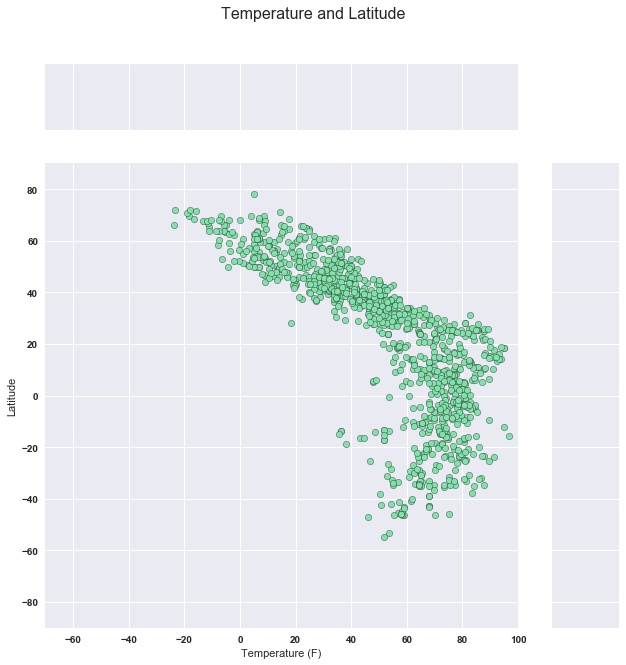

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['axes.titlepad'] = 10 
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
g = sns.JointGrid(x='temp_f', y='lat', data=df, size=10, ratio=5, space=.5,
                 ylim=(-20,110), xlim=(-60,90))
g.plot_joint(plt.scatter, color='#82E0AA',s=40, edgecolor='black')
#plt.title('Temperature and Latitude')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature and Latitude', fontsize=16)
plt.xlim(-70,100)
plt.ylim(-90,90)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.show()


## Humidity (%) vs. Latitude

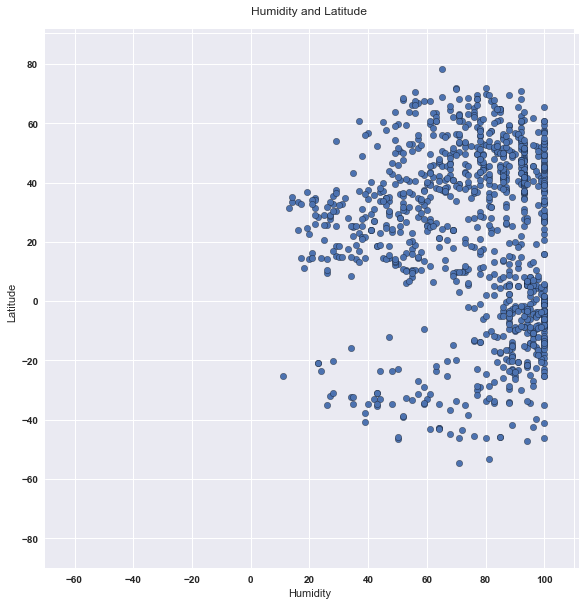

In [89]:


rcParams['axes.titlepad'] = 20
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 70}

plt.rc('font', **font)
g = sns.JointGrid(x='humidity', y='lat', data=df, size=10, ratio=100)
g.plot_joint(plt.scatter,s=40, edgecolor='black')
plt.xlim(-70,110)
plt.ylim(-90,90)
plt.title('Humidity and Latitude')
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()
plt.savefig("images/humidity_lat.png", dpi=100, 
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.5,
        frameon=None)

## Cloudiness (%) vs. Latitude

* in the more northerly regions of the world visibility goes up. 

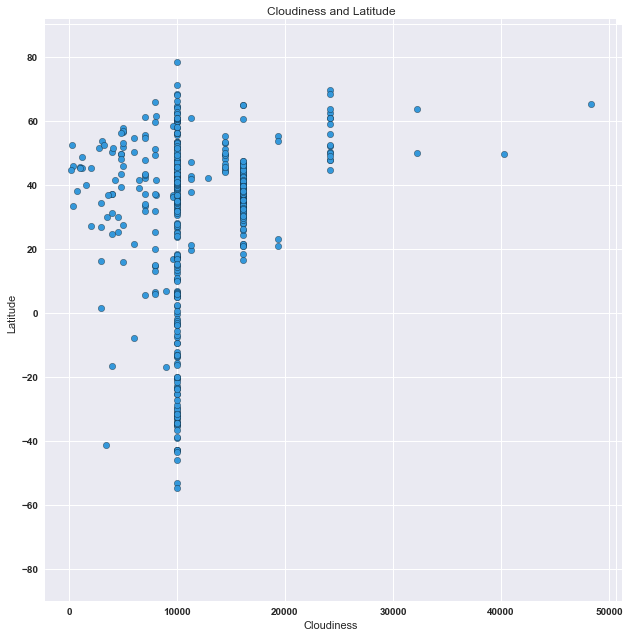

In [88]:

g = sns.JointGrid(x='visibility', y='lat', data=df, size=10, ratio=100)
g.plot_joint(plt.scatter, color='#3498DB',s=40, edgecolor='black')
plt.title('Cloudiness and Latitude')
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.show()
plt.savefig("images/vis_lat.png", dpi=100,
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

## Wind Speed (mph) vs. Latitude

* Generally we can see that around the equator wind speeds are lower

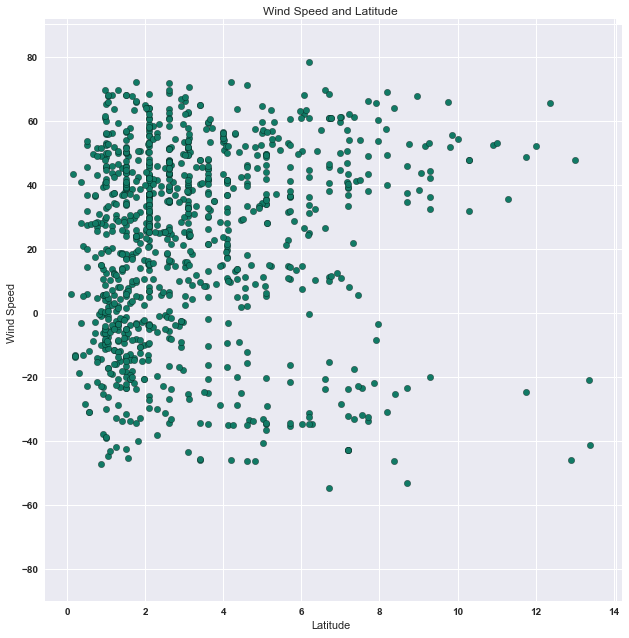

In [86]:


g = sns.JointGrid(x='wind_speed', y='lat', data=df, size=10, ratio=100)
g.plot_joint(plt.scatter, color='#117A65',s=40, edgecolor='black')

plt.title('Wind Speed and Latitude')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.ylim(-90,90)
plt.show()
plt.savefig("images/wind_lat.png", dpi=100,
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

## Frequent duplicate cities


* I used a random numbers generator to create lat, long values which were then fed into the citipy module. The citipy module will return the closest inhabited place of 500 and more, when given coordinates. If a city/town is more isolated, then it has a higher chance of being picked by the citipy module (given a uniform distribution of coordinates). Bellow is the top 10 locations most frequently returned locations by the citipy modules. Most of the towns are in nations from the southern hemisphere (Australia, New Zealand, South Africa, French Polynesia, Chile, Argentina) and coastal. 

In [83]:
duplic = pd.Series(duplicate_cities).value_counts()[:10]
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(duplic.index, duplic)
plt.xticks(rotation=70)
plt.title("Top Ten Most Randomly Found Cities")
plt.show()
#weatherless_cities

NameError: name 'duplicate_cities' is not defined

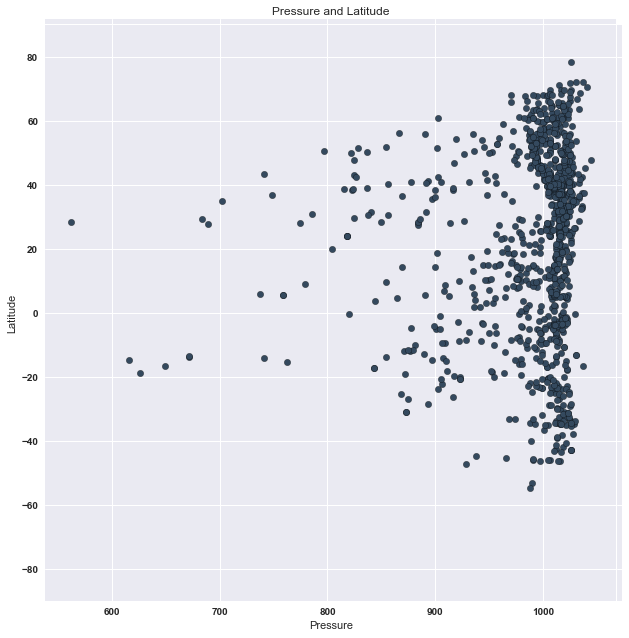

In [91]:

g = sns.JointGrid(x='pressure', y='lat', data=df, size=10, ratio=100)
g.plot_joint(plt.scatter, color='#34495E',s=40, edgecolor='black')

plt.title('Pressure and Latitude')
plt.xlabel("Pressure")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.show()


In [17]:
df.head(500).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>city_name</th>\n      <th>country</th>\n      <th>humidity</th>\n      <th>lat</th>\n      <th>loc_id</th>\n      <th>long</th>\n      <th>pressure</th>\n      <th>temp</th>\n      <th>temp_max</th>\n      <th>temp_min</th>\n      <th>visibility</th>\n      <th>weather_description</th>\n      <th>wind_speed</th>\n      <th>temp_f</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Thompson</td>\n      <td>CA</td>\n      <td>71</td>\n      <td>55.74</td>\n      <td>6165406</td>\n      <td>-97.86</td>\n      <td>1025.00</td>\n      <td>-14.00</td>\n      <td>-14.00</td>\n      <td>-14.00</td>\n      <td>24140.0</td>\n      <td>scattered clouds</td>\n      <td>1.00</td>\n      <td>6.800</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Castro</td>\n      <td>CL</td>\n      <td>96</td>\n      <td>-42.48</td>\n      <td>3896218</td>\n      <td>-73.